In [ ]:
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install bokeh
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install matplotlib

In [4]:
import pandas as pd
import matplotlib as plt

df = pd.read_csv('backtracking_benchmark.csv')
df

,Name,Input,Iterations per Second,Standard Deviation Iterations Per Second,Run Time Average,Run Time Median,Run Time Minimum,Run Time Maximum,Run Time Standard Deviation,Run Time Standard Deviation Ratio,Run Time Sample Size,Memory Usage Average,Memory Usage Median,Memory Usage Minimum,Memory Usage Maximum,Memory Usage Standard Deviation,Memory Usage Standard Deviation Ratio,Memory Usage Sample Size
0,backtracking_default,10 Queens optimal,49.567276,2.114247,2.017460e+07,2.004550e+07,1.896100e+07,2.565000e+07,8.605292e+05,0.042654,248,9.791944e+06,9.791944e+06,9791944,9791944,0.0,0.0,238
1,backtracking_minimum_remaining_values,10 Queens optimal,49.275894,1.573939,2.029390e+07,2.025200e+07,1.901000e+07,2.391000e+07,6.482149e+05,0.031941,247,9.875040e+06,9.875040e+06,9875040,9875040,0.0,0.0,233
2,backtracking_default,10 Queens slower,0.521186,0.004449,1.918702e+09,1.909768e+09,1.908731e+09,1.937607e+09,1.638042e+07,0.008537,3,7.307667e+08,7.307667e+08,730766688,730766688,0.0,0.0,3
3,backtracking_minimum_remaining_values,10 Queens slower,0.028346,0.000000,3.527894e+10,3.527894e+10,3.527894e+10,3.527894e+10,0.000000e+00,0.000000,1,1.314175e+10,1.314175e+10,13141751072,13141751072,0.0,0.0,1
4,backtracking_default,15 Queens optimal,1.139949,0.038924,8.772323e+08,8.766640e+08,8.392320e+08,9.208000e+08,2.995325e+07,0.034145,6,4.171074e+08,4.171074e+08,417107408,417107408,0.0,0.0,6
5,backtracking_minimum_remaining_values,15 Queens optimal,1.137472,0.037341,8.791425e+08,8.793970e+08,8.395610e+08,9.163070e+08,2.886032e+07,0.032828,6,4.185255e+08,4.185255e+08,418525456,418525456,0.0,0.0,6
6,backtracking_default,4 Queens optimal,9029.415328,1129.571473,1.107491e+05,1.050000e+05,1.010000e+05,7.060000e+05,1.385461e+04,0.125099,44870,6.345600e+04,6.345600e+04,63456,63456,0.0,0.0,23655
7,backtracking_minimum_remaining_values,4 Queens optimal,8594.638613,1070.109479,1.163516e+05,1.100000e+05,1.050000e+05,7.530000e+05,1.448682e+04,0.124509,42670,6.772800e+04,6.772800e+04,67728,67728,0.0,0.0,22807
8,backtracking_default,4 Queens slower,339.239284,15.719155,2.947772e+06,2.915000e+06,2.780000e+06,5.000000e+06,1.365894e+05,0.046336,1696,9.830720e+05,9.830720e+05,983072,983072,0.0,0.0,1600
9,backtracking_minimum_remaining_values,4 Queens slower,315.540037,14.057497,3.169170e+06,3.160000e+06,2.897000e+06,5.027000e+06,1.411884e+05,0.044551,1577,1.039856e+06,1.039856e+06,1039856,1039856,0.0,0.0,1539


In [5]:
df_optimal_by_size = df \
    .loc[(df['Name'] == 'backtracking_default') & (df['Input'].str.contains('optimal')), ['Input', 'Run Time Median']] \
    .sort_values(by='Run Time Median') \
    .copy() \
    .replace(to_replace='(\d+) Queens optimal', value='\\1', regex=True)

df_optimal_by_size['Input'] = df_optimal_by_size['Input'].apply(lambda x: int(x))
df_optimal_by_size['Run Time Median'] = df_optimal_by_size['Run Time Median'].apply(lambda x: x / 1_000_000.0)

df_optimal_by_size

,Input,Run Time Median
6,4,0.1050
10,8,12.3965
0,10,20.0455
4,15,876.6640


In [6]:
df_slower_by_size = df \
    .loc[(df['Name'] == 'backtracking_default') & (df['Input'].str.contains('slower')), ['Input', 'Run Time Median']] \
    .sort_values(by='Run Time Median') \
    .copy() \
    .replace(to_replace='(\d+) Queens slower', value='\\1', regex=True)

df_slower_by_size['Input'] = df_slower_by_size['Input'].apply(lambda x: int(x))
df_slower_by_size['Run Time Median'] = df_slower_by_size['Run Time Median'].apply(lambda x: x / 1_000_000.0)

df_slower_by_size

,Input,Run Time Median
8,4,2.915
12,8,987.693
2,10,1909.768


In [7]:
df_optimal_vs_slower_by_size = df_optimal_by_size.set_index('Input').join(df_slower_by_size.set_index('Input'), how='left', rsuffix=' (slower)')

df_optimal_vs_slower_by_size

,Run Time Median,Run Time Median (slower)
Input,,
4,0.1050,2.915
8,12.3965,987.693
10,20.0455,1909.768
15,876.6640,NaN


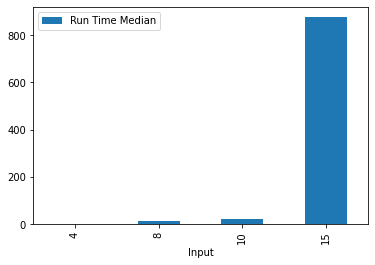

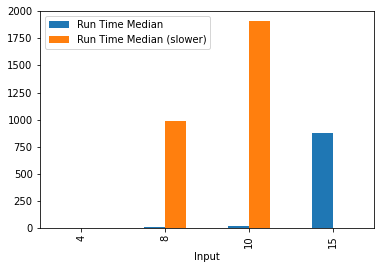

In [9]:
df_optimal_by_size.plot.bar(x='Input')
df_optimal_vs_slower_by_size.plot.bar()

## Boxplots for performance comparision

In [173]:
df = pd.read_csv('backtracking_benchmark_raw.csv')
# convert from nanoseconds to milliseconds
df = df.applymap(lambda value: value / 1_000_000)
df

,backtracking_default with input 10 Queens optimal (Run Time Measurements),backtracking_default with input 10 Queens optimal (Memory Usage Measurements),backtracking_minimum_remaining_values with input 10 Queens optimal (Run Time Measurements),backtracking_minimum_remaining_values with input 10 Queens optimal (Memory Usage Measurements),backtracking_default with input 10 Queens slower (Run Time Measurements),backtracking_default with input 10 Queens slower (Memory Usage Measurements),backtracking_minimum_remaining_values with input 10 Queens slower (Run Time Measurements),backtracking_minimum_remaining_values with input 10 Queens slower (Memory Usage Measurements),backtracking_default with input 15 Queens optimal (Run Time Measurements),backtracking_default with input 15 Queens optimal (Memory Usage Measurements),...,backtracking_minimum_remaining_values with input 4 Queens slower (Run Time Measurements),backtracking_minimum_remaining_values with input 4 Queens slower (Memory Usage Measurements),backtracking_default with input 8 Queens optimal (Run Time Measurements),backtracking_default with input 8 Queens optimal (Memory Usage Measurements),backtracking_minimum_remaining_values with input 8 Queens optimal (Run Time Measurements),backtracking_minimum_remaining_values with input 8 Queens optimal (Memory Usage Measurements),backtracking_default with input 8 Queens slower (Run Time Measurements),backtracking_default with input 8 Queens slower (Memory Usage Measurements),backtracking_minimum_remaining_values with input 8 Queens slower (Run Time Measurements),backtracking_minimum_remaining_values with input 8 Queens slower (Memory Usage Measurements)
0,19.968,9.791944,20.290,9.87504,1909.768,730.766688,35278.94,13141.751072,839.232,417.107408,...,3.619,1.039856,12.934,6.176432,13.111,6.252816,979.688,335.388544,1630.146,458.21504
1,19.082,9.791944,19.535,9.87504,1937.607,730.766688,NaN,NaN,852.681,417.107408,...,3.336,1.039856,11.915,6.176432,11.905,6.252816,992.565,335.388544,1653.564,458.21504
2,19.200,9.791944,19.209,9.87504,1908.731,730.766688,NaN,NaN,868.431,417.107408,...,3.004,1.039856,11.989,6.176432,12.580,6.252816,1012.689,335.388544,1680.860,458.21504
3,18.961,9.791944,19.298,9.87504,NaN,NaN,NaN,NaN,884.897,417.107408,...,2.897,1.039856,11.761,6.176432,12.110,6.252816,1028.109,335.388544,1629.158,458.21504
4,19.236,9.791944,19.010,9.87504,NaN,NaN,NaN,NaN,897.353,417.107408,...,2.961,1.039856,11.769,6.176432,12.103,6.252816,982.570,335.388544,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44866,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44867,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44868,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [174]:
# throwing away memory measurements for now
columns = [column for column in df.columns if 'Memory Usage Measurements' not in column]
df = df.loc[:, columns]
# simplify labels
df = df.rename(columns=lambda column_name: column_name.replace(' (Run Time Measurements)', '').replace(' with input ', ' ').replace('backtracking_', ''))

df

,default 10 Queens optimal,minimum_remaining_values 10 Queens optimal,default 10 Queens slower,minimum_remaining_values 10 Queens slower,default 15 Queens optimal,minimum_remaining_values 15 Queens optimal,default 4 Queens optimal,minimum_remaining_values 4 Queens optimal,default 4 Queens slower,minimum_remaining_values 4 Queens slower,default 8 Queens optimal,minimum_remaining_values 8 Queens optimal,default 8 Queens slower,minimum_remaining_values 8 Queens slower
0,19.968,20.290,1909.768,35278.94,839.232,839.561,0.137,0.148,3.530,3.619,12.934,13.111,979.688,1630.146
1,19.082,19.535,1937.607,NaN,852.681,856.848,0.126,0.134,2.983,3.336,11.915,11.905,992.565,1653.564
2,19.200,19.209,1908.731,NaN,868.431,871.219,0.137,0.145,2.999,3.004,11.989,12.580,1012.689,1680.860
3,18.961,19.298,NaN,NaN,884.897,887.575,0.126,0.129,2.980,2.897,11.761,12.110,1028.109,1629.158
4,19.236,19.010,NaN,NaN,897.353,903.345,0.128,0.136,2.919,2.961,11.769,12.103,982.570,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44865,NaN,NaN,NaN,NaN,NaN,NaN,0.105,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44866,NaN,NaN,NaN,NaN,NaN,NaN,0.107,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44867,NaN,NaN,NaN,NaN,NaN,NaN,0.133,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44868,NaN,NaN,NaN,NaN,NaN,NaN,0.106,NaN,NaN,NaN,NaN,NaN,NaN,NaN


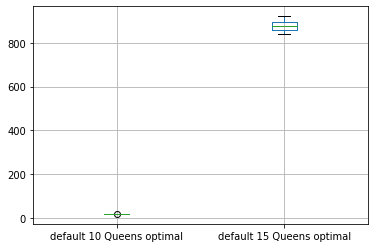

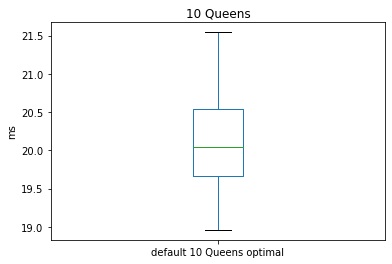

In [179]:
backtracking_10_optimal_default = df.loc[:, ['default 10 Queens optimal']].dropna(axis=0)

b10 = backtracking_10_optimal_default.plot.box(showfliers=False)
b10.set_ylabel('ms')
b10.set_title('10 Queens')
b10

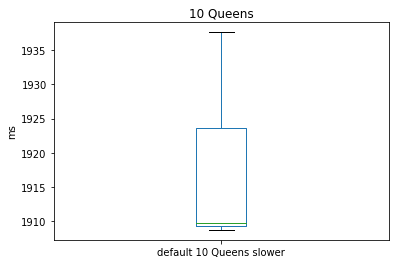

In [178]:
backtracking_10_slower_default = df.loc[:, ['default 10 Queens slower']].dropna(axis=0)

b10_slower = backtracking_10_slower_default.plot.box(showfliers=False)
b10_slower.set_ylabel('ms')
b10_slower.set_title('10 Queens')
b10_slower